In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# 엑셀 파일 로드
file_path1 = './logs/ChangedDataset/test_results_U-Net.xlsx'  # 첫 번째 엑셀 파일 경로
file_path2 = './logs/ChangedDataset/test_results.xlsx'        # 두 번째 엑셀 파일 경로 (Proposed)

data1 = pd.read_excel(file_path1)
data2 = pd.read_excel(file_path2)

In [44]:
# 데이터 병합 및 'Model' 컬럼 추가
data1['Model'] = 'Existing U-Net'
data2['Model'] = 'Proposed'

combined_data = pd.concat([data1, data2])

# 수동으로 색상 지정
colors = {
    (1, 'Existing U-Net'): '#b3cde0',  # 토마토
    (4, 'Existing U-Net'): '#6497b1',  # 스틸블루
    (7, 'Existing U-Net'): '#005b96',  # 라임그린
    (13, 'Existing U-Net'): '#03396c', # 오차드
    (19, 'Existing U-Net'): '#011f4b', # 골드
    (1, 'Proposed'): '#f29494',     # 오렌지레드
    (4, 'Proposed'): '#e35454',     # 로얄블루
    (7, 'Proposed'): '#f63131',     # 시그린
    (13, 'Proposed'): '#d82020',    # 미디엄바이올렛레드
    (19, 'Proposed'): '#a51515'     # 오렌지
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


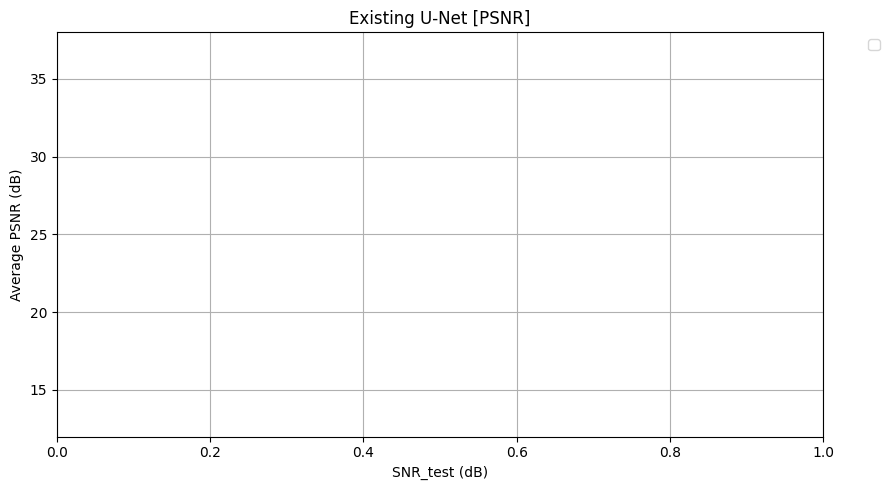

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


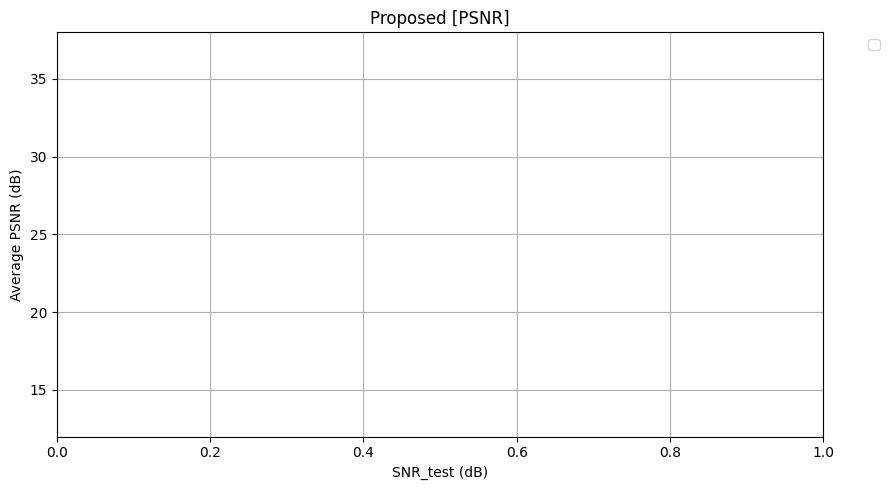

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


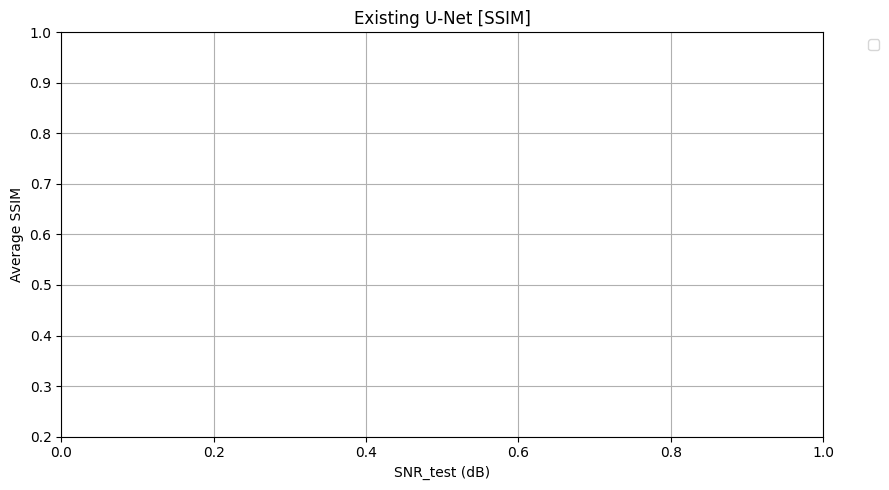

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


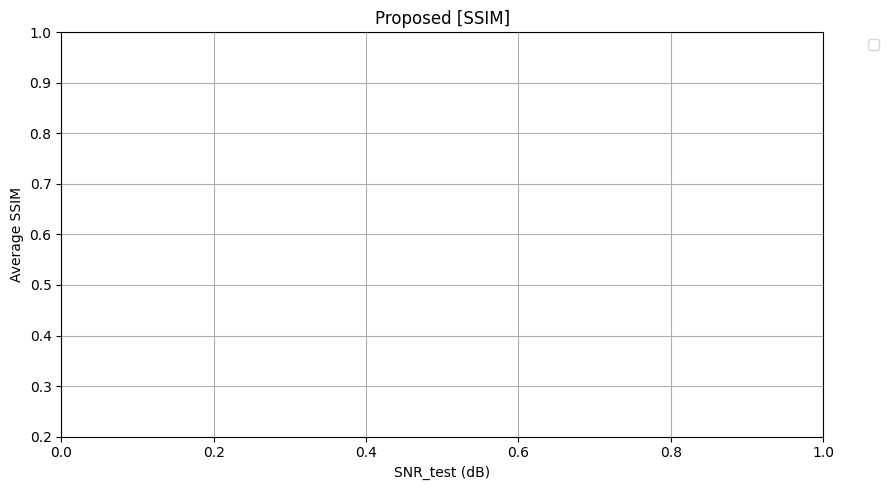

In [45]:
# Original 모델에 대한 PSNR 그래프 설정
plt.figure(figsize=(10, 5))
for label, df in combined_data[combined_data['Model'] == 'Original U-Net'].groupby('Train SNR'):
    plt.plot(df['Test SNRs'], df['Average PSNR'], '-o', label=f'Original SNR_train = {label} dB')

plt.title('Existing U-Net [PSNR]')
plt.xlabel('SNR_test (dB)')
plt.ylabel('Average PSNR (dB)')
plt.ylim(12, 38)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Proposed 모델에 대한 PSNR 그래프 설정
plt.figure(figsize=(10, 5))
for label, df in combined_data[combined_data['Model'] == 'Proposed Importance map'].groupby('Train SNR'):
    plt.plot(df['Test SNRs'], df['Average PSNR'], '-o', label=f'Proposed SNR_train = {label} dB')

plt.title('Proposed [PSNR]')
plt.xlabel('SNR_test (dB)')
plt.ylabel('Average PSNR (dB)')
plt.ylim(12, 38)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Original 모델에 대한 SSIM 그래프 설정
plt.figure(figsize=(10, 5))
for label, df in combined_data[combined_data['Model'] == 'Original U-Net'].groupby('Train SNR'):
    plt.plot(df['Test SNRs'], df['Average SSIM'], '-s', label=f'SNR_train = {label} dB')

plt.title('Existing U-Net [SSIM]')
plt.xlabel('SNR_test (dB)')
plt.ylabel('Average SSIM')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylim(0.2, 1)
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Proposed 모델에 대한 SSIM 그래프 설정
plt.figure(figsize=(10, 5))
for label, df in combined_data[combined_data['Model'] == 'Proposed Importance map'].groupby('Train SNR'):
    plt.plot(df['Test SNRs'], df['Average SSIM'], '-s', label=f'SNR_train = {label} dB')

plt.title('Proposed [SSIM]')
plt.xlabel('SNR_test (dB)')
plt.ylabel('Average SSIM')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylim(0.2, 1)
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

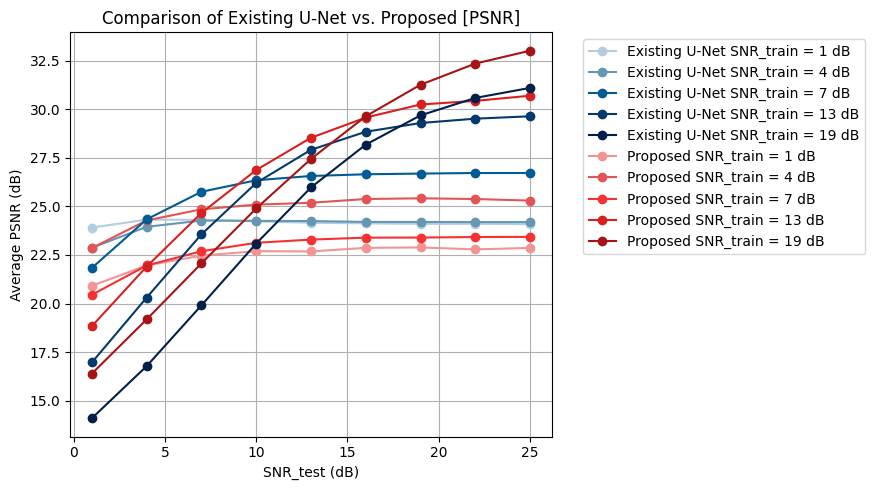

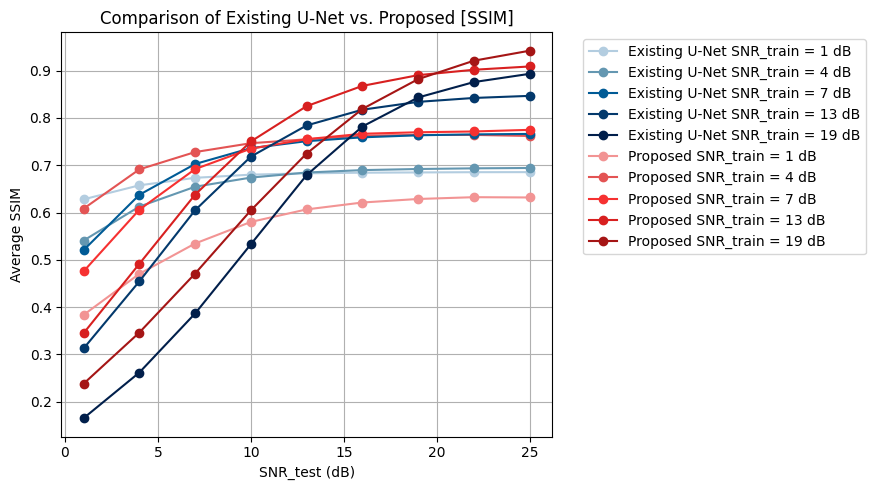

In [46]:
# PSNR 그래프 설정
plt.figure(figsize=(10, 5))
lines_psnr = []  # 범례 핸들을 저장할 리스트
labels_psnr = []  # 범례 라벨을 저장할 리스트

for (label, model), df in combined_data.groupby(['Train SNR', 'Model']):
    line, = plt.plot(df['Test SNRs'], df['Average PSNR'], '-o', label=f'{model} SNR = {label} dB', color=colors[(label, model)])
    lines_psnr.append(line)
    labels_psnr.append(f'{model} SNR_train = {label} dB')

# 범례 항목 정렬
order_psnr = [idx for idx, label in enumerate(labels_psnr) if 'Existing U-Net' in label] + \
             [idx for idx, label in enumerate(labels_psnr) if 'Proposed' in label]

plt.title('Comparison of Existing U-Net vs. Proposed [PSNR]')
plt.xlabel('SNR_test (dB)')
plt.ylabel('Average PSNR (dB)')
plt.legend([lines_psnr[idx] for idx in order_psnr], [labels_psnr[idx] for idx in order_psnr], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# SSIM 그래프 설정
plt.figure(figsize=(10, 5))
lines_ssim = []  # 범례 핸들을 저장할 리스트
labels_ssim = []  # 범례 라벨을 저장할 리스트

for (label, model), df in combined_data.groupby(['Train SNR', 'Model']):
    line, = plt.plot(df['Test SNRs'], df['Average SSIM'], '-o', label=f'{model} SNR = {label} dB', color=colors[(label, model)])
    lines_ssim.append(line)
    labels_ssim.append(f'{model} SNR_train = {label} dB')

# 범례 항목 정렬
order_ssim = [idx for idx, label in enumerate(labels_ssim) if 'Existing U-Net' in label] + \
             [idx for idx, label in enumerate(labels_ssim) if 'Proposed' in label]

plt.title('Comparison of Existing U-Net vs. Proposed [SSIM]')
plt.xlabel('SNR_test (dB)')
plt.ylabel('Average SSIM')
plt.legend([lines_ssim[idx] for idx in order_ssim], [labels_ssim[idx] for idx in order_ssim], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()